In [27]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import os
from astropy.constants import c
from astropy import constants as const
import astropy.units as u
from scipy import special


def weight(n):
    return 2 * n**2

def boltzmann(n1, n2, eV, T):
    k = 8.6173303e-5  # Boltzmann constant in eV/K
    g_n = weight(n2) / weight(n1) * np.exp(-eV / (k * T))
    return g_n

def CIV(T):
    sigma_Lya = 5.9e-14 * (T / 1e4) ** (-1/2)
    sigma_CIV = (0.19 / 0.4164) * sigma_Lya * (12) ** (0.5)
    N_CIV_0 = 1 / sigma_CIV
    return sigma_Lya, sigma_CIV, N_CIV_0

sig_ly, sig_c, N_CIV_0 = CIV(1e5)
print("{:.2e}".format(N_CIV_0))

def tau(sig_c, x):
    return sig_c * x


directory_1 = '/home/jin/data_jin/'
rr = np.arange(12, 17, 1)
atom_N = [13, 20, 32, 50, 79]
rr_reshaped = rr.reshape(-1, 1)
total_N_c = 10**rr_reshaped * atom_N / 10
total_N_c = total_N_c.flatten()

emit = np.arange(1000,6000,1000)
emit = np.append(1,emit)

expand_vel = np.arange(0,6000,1000)

random_vel = np.arange(1000,6000,1000)
random_vel= np.append(118,random_vel)


C_IV_K = 1548.187e-8  # cm
C_IV_H = 1550.772e-8  # cm

C_IV_K_A = 1548.187 # cm
C_IV_H_A = 1550.772  # cm

cc = c.to(u.cm / u.s).value
v_th = 11.7673179819719e5  # cm/s

K_gamma = 2.65e+8
H_gamma = 2.64e+8
f_CIV_K = 0.190
f_CIV_H = 0.0952


# directory_1 = '/home/jin/data_jin/'

cc_k = c.to(u.km / u.s).value
V_K = 0
V_H = (C_IV_H/C_IV_K -1 ) * cc_k
def function(sigma,lam,lam_k,lam_h):
    tv_k = ((lam-lam_k) / lam_k ) * cc_k
    tv_h = ((lam-lam_h) / lam_h ) * cc_k
    tk = (tv_k)**2 / sigma**2
    th = (tv_h)**2 / sigma**2
    fx = (1 / np.sqrt(2*np.pi*sigma**2))  *(2*np.exp(-tk/2) + np.exp(-th/2) )
    f0 = fx[np.argmax(fx)]
    return fx , f0

# plt.plot(del_V_space_g,yy_g)


def finding_FWHM_K(x, y,v_0):


    y_1_max = y.max()
    yc_1 = y_1_max / 2
    x_f_1 = []

    for ii in range(len(y) - 1):
        bb_1 = (y[ii] - yc_1) * (y[ii+1] - yc_1)    
        if bb_1 < 0:
            x_f_1.append(x[ii])

    if x_f_1 :
        # blue_w = abs(min(x_f_1) - x_1[np.argmax(y_1)])
        FWHM = abs(min(x_f_1) - v_0)
    else:
        FWHM = 0

    # print(yc_1, yc_2)
    return FWHM*2


def finding_FWHM_H(x, y,v_0):

    y_1_max = y.max()
    yc_1 = y_1_max / 2
    x_f_1 = []

    for ii in range(len(y) - 1):
        bb_1 = (y[ii] - yc_1) * (y[ii+1] - yc_1)    
        if bb_1 < 0:
            x_f_1.append(x[ii])

    if x_f_1 :
        # blue_w = abs(min(x_f_1) - x_1[np.argmax(y_1)])
        FWHM = abs(min(x_f_1) - v_0)
    else:
        FWHM = 0

    # print(yc_1, yc_2)
    return FWHM*2

sigma_Lya, sigma_CIV, N_CIV_0 = CIV(1e5)
tau_0 = tau(sigma_CIV,total_N_c)

3.39e+13


In [31]:
directory_1 = '/home/jin/data_jin/'
check = 0
emit = 1
for a , index in enumerate(rr):
    for b, expand in enumerate(expand_vel ):
        if expand < 1000 and expand > 0 :
            expand_v = expand 
            num_ev = 1
        elif expand == 0:
            expand_v = '000'
            num_ev = 0
        else: 
            num_ev = 2
            expand_v = int(expand/10)
        for c, vel in enumerate(random_vel):
            if vel < 1000 :
                 velr_v = vel
                 num_vr = 1
            else:
                velr_v = int(vel/10)
                num_vr = 2
            for d, atom_n in enumerate(atom_N):
                path_sp = f'{directory_1}N_atom{atom_n}0E+{index}_Vexp{expand_v}E+0{num_ev}_Vemit100E+00_tauD000E+00_Vran{velr_v}E+0{num_vr}spec_com.dat'         
                try:
                    data_sp = pd.read_csv(path_sp, sep='\s+', header=None)
                except FileNotFoundError:
                    print(f"파일을 찾을 수 없습니다: {path_sp}")
                    check += 1
                    continue 

                
                globals()[f'data_sp_{atom_n}_{index}_{expand}_{emit}_{vel}'] = pd.read_csv(path_sp, sep='\s+', header=None)
                globals()[f'sp_dlam_{atom_n}_{index}_{expand}_{emit}_{vel}'] = globals()[f'data_sp_{atom_n}_{index}_{expand}_{emit}_{vel}'][0]
                globals()[f'sp_{atom_n}_{index}_{expand}_{emit}_{vel}'] = globals()[f'data_sp_{atom_n}_{index}_{expand}_{emit}_{vel}'][2]

                # K and H line seperate
                lam_c = (C_IV_K_A+C_IV_H_A)/2
                #K line
                globals()[f'lambda_K_{atom_n}_{index}_{expand}_{emit}_{vel}'] = globals()[f'sp_dlam_{atom_n}_{index}_{expand}_{emit}_{vel}'] [globals()[f'sp_dlam_{atom_n}_{index}_{expand}_{emit}_{vel}'] <= lam_c]
                globals()[f'flux_K_{atom_n}_{index}_{expand}_{emit}_{vel}'] = globals()[f'sp_{atom_n}_{index}_{expand}_{emit}_{vel}'] [globals()[f'sp_dlam_{atom_n}_{index}_{expand}_{emit}_{vel}'] <= lam_c]
                #H line
                globals()[f'lambda_H_{atom_n}_{index}_{expand}_{emit}_{vel}'] = globals()[f'sp_dlam_{atom_n}_{index}_{expand}_{emit}_{vel}'] [globals()[f'sp_dlam_{atom_n}_{index}_{expand}_{emit}_{vel}'] >= lam_c]
                globals()[f'flux_H_{atom_n}_{index}_{expand}_{emit}_{vel}'] = globals()[f'sp_{atom_n}_{index}_{expand}_{emit}_{vel}'] [globals()[f'sp_dlam_{atom_n}_{index}_{expand}_{emit}_{vel}'] >= lam_c]

                #K line double peak separate
                # K line center -  approximate 0.002% remove
                # Because of the direcetly escape photons
                X_K_P = globals()[f'lambda_K_{atom_n}_{index}_{expand}_{emit}_{vel}'][globals()[f'lambda_K_{atom_n}_{index}_{expand}_{emit}_{vel}'] >= 1548.218].to_numpy()
                X_K_N = globals()[f'lambda_K_{atom_n}_{index}_{expand}_{emit}_{vel}'][globals()[f'lambda_K_{atom_n}_{index}_{expand}_{emit}_{vel}'] <= 1548.156].to_numpy()
                filtered_series_K_pos_1 = globals()[f'flux_K_{atom_n}_{index}_{expand}_{emit}_{vel}'][globals()[f'lambda_K_{atom_n}_{index}_{expand}_{emit}_{vel}'] >= 1548.218].to_numpy()
                filtered_series_K_neg_1 = globals()[f'flux_K_{atom_n}_{index}_{expand}_{emit}_{vel}'][globals()[f'lambda_K_{atom_n}_{index}_{expand}_{emit}_{vel}'] <= 1548.156].to_numpy()

                tt_K = (globals()[f'lambda_K_{atom_n}_{index}_{expand}_{emit}_{vel}'] <= 1548.156) | (globals()[f'lambda_K_{atom_n}_{index}_{expand}_{emit}_{vel}'] >= 1548.218)

                # 조건을 만족하지 않는 요소를 추출
                globals()[f'x_K_{atom_n}_{index}_{expand}_{emit}_{vel}'] = np.compress(tt_K,globals()[f'lambda_K_{atom_n}_{index}_{expand}_{emit}_{vel}'])
                globals()[f'y_K_{atom_n}_{index}_{expand}_{emit}_{vel}']= np.compress(tt_K, globals()[f'flux_K_{atom_n}_{index}_{expand}_{emit}_{vel}'])
                

                #H line double peak separate
                # H line center -  approximate 0.002% remove
                # Because of the direcetly escape photons

                X_H_P = globals()[f'lambda_H_{atom_n}_{index}_{expand}_{emit}_{vel}'][globals()[f'lambda_H_{atom_n}_{index}_{expand}_{emit}_{vel}'] >= 1550.783].to_numpy()
                X_H_N = globals()[f'lambda_H_{atom_n}_{index}_{expand}_{emit}_{vel}'][globals()[f'lambda_H_{atom_n}_{index}_{expand}_{emit}_{vel}'] <= 1550.721].to_numpy()
                filtered_series_H_pos_1 = globals()[f'flux_H_{atom_n}_{index}_{expand}_{emit}_{vel}'][globals()[f'lambda_H_{atom_n}_{index}_{expand}_{emit}_{vel}'] >= 1550.783].to_numpy()
                filtered_series_H_neg_1 = globals()[f'flux_H_{atom_n}_{index}_{expand}_{emit}_{vel}'][globals()[f'lambda_H_{atom_n}_{index}_{expand}_{emit}_{vel}'] <= 1550.721].to_numpy()

                tt_H = (globals()[f'lambda_H_{atom_n}_{index}_{expand}_{emit}_{vel}'] <= 1550.721) | (globals()[f'lambda_H_{atom_n}_{index}_{expand}_{emit}_{vel}'] > 1550.783)

                # 조건을 만족하지 않는 요소를 추출
                globals()[f'x_H_{atom_n}_{index}_{expand}_{emit}_{vel}'] = np.compress(tt_H,globals()[f'lambda_H_{atom_n}_{index}_{expand}_{emit}_{vel}'])
                globals()[f'y_H_{atom_n}_{index}_{expand}_{emit}_{vel}']= np.compress(tt_H, globals()[f'flux_H_{atom_n}_{index}_{expand}_{emit}_{vel}'])




                globals()[f'vx_K_{atom_n}_{index}_{expand}_{emit}_{vel}'] = ((globals()[f'x_K_{atom_n}_{index}_{expand}_{emit}_{vel}'] - C_IV_K_A) /  C_IV_K_A)*cc_k
                globals()[f'vy_K_{atom_n}_{index}_{expand}_{emit}_{vel}']=  globals()[f'y_K_{atom_n}_{index}_{expand}_{emit}_{vel}']



                globals()[f'vx_H_{atom_n}_{index}_{expand}_{emit}_{vel}'] = ((globals()[f'x_H_{atom_n}_{index}_{expand}_{emit}_{vel}'] - C_IV_K_A) /  C_IV_K_A)*cc_k
                globals()[f'vy_H_{atom_n}_{index}_{expand}_{emit}_{vel}']=  globals()[f'y_H_{atom_n}_{index}_{expand}_{emit}_{vel}']
     
print(check)  

0


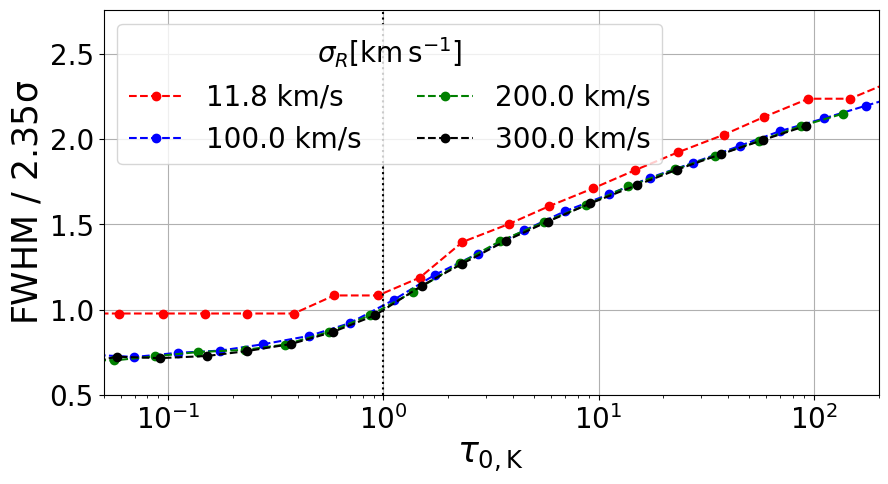

In [36]:
# atom_n,index, expand = 32,13,0
vel_0 = 118
emit_n = 1
expand = 0
vel = 118
import math
blue_K = np.zeros(len(total_N_c))
red_K = np.copy(blue_K)
blue_H = np.copy(blue_K)
red_H = np.copy(blue_K)

K_FWHM = np.copy(blue_K)
H_FWHM = np.copy(blue_K)
T_FWHM = np.copy(blue_K)
for ii, N_civ in enumerate(total_N_c):
    index = math.floor(math.log10(N_civ))
    atom_n = int(N_civ/ 10**index * 10)
    K_FWHM[ii] = finding_FWHM_K(globals()[f'vx_K_{atom_n}_{index}_{expand}_{emit_n}_{vel}'] ,globals()[f'vy_K_{atom_n}_{index}_{expand}_{emit_n}_{vel}'],V_K)
    H_FWHM[ii]  = finding_FWHM_H(globals()[f'vx_H_{atom_n}_{index}_{expand}_{emit_n}_{vel}'] ,globals()[f'vy_H_{atom_n}_{index}_{expand}_{emit_n}_{vel}'],V_H) 

fig = plt.figure(1,figsize=(10,5))

plt.plot(tau_0/(vel/vel_0), (K_FWHM /vel*10/(2*np.sqrt(2*np.log(2)))) ,'ro--',label=f'{vel/10} km/s')

vel = 1000
import math
blue_K = np.zeros(len(total_N_c))
red_K = np.copy(blue_K)
blue_H = np.copy(blue_K)
red_H = np.copy(blue_K)

K_FWHM = np.copy(blue_K)
H_FWHM = np.copy(blue_K)
T_FWHM = np.copy(blue_K)
for ii, N_civ in enumerate(total_N_c):
    index = math.floor(math.log10(N_civ))
    atom_n = int(N_civ/ 10**index * 10)
    K_FWHM[ii] = finding_FWHM_K(globals()[f'vx_K_{atom_n}_{index}_{expand}_{emit_n}_{vel}'] ,globals()[f'vy_K_{atom_n}_{index}_{expand}_{emit_n}_{vel}'],V_K)
    H_FWHM[ii]  = finding_FWHM_H(globals()[f'vx_H_{atom_n}_{index}_{expand}_{emit_n}_{vel}'] ,globals()[f'vy_H_{atom_n}_{index}_{expand}_{emit_n}_{vel}'],V_H) 

fig = plt.figure(1,figsize=(10,5))



plt.plot(tau_0/(vel/vel_0),K_FWHM /vel*10/(2*np.sqrt(2*np.log(2))) ,'bo--',label=f'{vel/10} km/s')




vel = 2000
import math
blue_K = np.zeros(len(total_N_c))
red_K = np.copy(blue_K)
blue_H = np.copy(blue_K)
red_H = np.copy(blue_K)

K_FWHM = np.copy(blue_K)
H_FWHM = np.copy(blue_K)
T_FWHM = np.copy(blue_K)
for ii, N_civ in enumerate(total_N_c):
    index = math.floor(math.log10(N_civ))
    atom_n = int(N_civ/ 10**index * 10)
    K_FWHM[ii] = finding_FWHM_K(globals()[f'vx_K_{atom_n}_{index}_{expand}_{emit_n}_{vel}'] ,globals()[f'vy_K_{atom_n}_{index}_{expand}_{emit_n}_{vel}'],V_K)
    H_FWHM[ii]  = finding_FWHM_H(globals()[f'vx_H_{atom_n}_{index}_{expand}_{emit_n}_{vel}'] ,globals()[f'vy_H_{atom_n}_{index}_{expand}_{emit_n}_{vel}'],V_H) 



plt.plot(tau_0/(vel/vel_0),K_FWHM /vel*10/(2*np.sqrt(2*np.log(2))) ,'go--',label=f'{vel/10} km/s')


vel = 3000
import math
blue_K = np.zeros(len(total_N_c))
red_K = np.copy(blue_K)
blue_H = np.copy(blue_K)
red_H = np.copy(blue_K)

K_FWHM = np.copy(blue_K)
H_FWHM = np.copy(blue_K)
T_FWHM = np.copy(blue_K)
for ii, N_civ in enumerate(total_N_c):
    index = math.floor(math.log10(N_civ))
    atom_n = int(N_civ/ 10**index * 10)
    K_FWHM[ii] = finding_FWHM_K(globals()[f'vx_K_{atom_n}_{index}_{expand}_{emit_n}_{vel}'] ,globals()[f'vy_K_{atom_n}_{index}_{expand}_{emit_n}_{vel}'],V_K)
    H_FWHM[ii]  = finding_FWHM_H(globals()[f'vx_H_{atom_n}_{index}_{expand}_{emit_n}_{vel}'] ,globals()[f'vy_H_{atom_n}_{index}_{expand}_{emit_n}_{vel}'],V_H) 



plt.plot(tau_0/(vel/vel_0),K_FWHM /vel*10/(2*np.sqrt(2*np.log(2)))  ,'ko--',label=f'{vel/10} km/s')

# plt.plot(total_N_c,H_FWHM,'ro-',label='H line')
plt.xscale('log')
plt.axvline(x=1,ymin=0,ymax=5,color='k',linestyle=':')
plt.xlabel(r'$\tau_{0,\rm K}$',fontsize=25)
plt.ylabel(r'$ \rm {FWHM} ~/~ {2.35 \sigma}$',fontsize=25)
plt.legend(fontsize=20,ncol=2,title=f'$\sigma_{{R}} = {vel/10} ~~ [\\rm km \\, s^{{-1}}] $',title_fontsize=25)
plt.xlim(0.05,2e2)
plt.xticks(fontsize=20)
plt.yticks([0.5,1.0,1.5,2.0,2.5],fontsize=20)
plt.grid(True)
plt.legend(loc='upper left',fontsize = 20,ncol=2,title = r'$\sigma_R [\rm km \, s^{-1}]$',title_fontsize=20)




# plt.savefig(r'/home/jin/바탕화면/column_density_FWHM.pdf',bbox_inches='tight')

In [17]:
atom_n,index, expand = 32,13,0
vel_0 = 118
emit_n = 1
# expand = 0
vel = 
a = f'vx_K_{atom_n}_{index}_{expand}_{emit_n}_{vel}'
a

'vx_K_32_13_0_1_118'